In [1]:
import pandas as pd
import numpy as np 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
from nltk.probability import FreqDist
from os import path 
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt 
import plotly.express as px
%matplotlib inline
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Grams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Grams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
house_permit_value_filter =  pd.read_csv('house_permit_value.csv')

In [3]:
house_permit_value_filter.head()

,Unnamed: 0,address,lat,long,PIN,date,description,tokenized_final,cost,value,year
0,0,1752 N GAY ST,39.310536,-76.586421,1451014,03/28/2019,interior and exterior alteration of an existin...,"['interior', 'exterior', 'alteration', 'existi...",700000.0,226300.0,2019
1,1,3401 LABYRINTH RD,39.366900,-76.698112,4250041,03/28/2019,demolition of building/structure(wood)(1) leng...,"['demolition', 'building/structure', 'wood', '...",0.0,106000.0,2019
2,2,815 BROOKS LANE,39.315946,-76.634808,3463F005B,06/05/2008,new windows (13) 2-new exterior doors ceramic...,"['windows', '2-new', 'exterior', 'doors', 'cer...",12000.0,166100.0,2008
3,3,1743 DRUID HILL AVE,39.305789,-76.633306,0340022,12/26/2019,*authorization to proceed* install new sanitar...,"['*authorization', 'proceed*', 'install', 'san...",5375.0,63400.0,2019
4,4,6026 PINEHURST RD,39.367377,-76.615552,5088012,12/26/2019,install (13) # plumbing fixtures (1) # sani...,"['install', 'plumbing', 'fixtures', 'sanitary'...",5500.0,92267.0,2019


In [4]:
house_permit_value_filter = house_permit_value_filter[house_permit_value_filter["cost"].notnull()]
house_permit_value_filter = house_permit_value_filter[house_permit_value_filter["cost"] != -166]
house_permit_value_filter = house_permit_value_filter[house_permit_value_filter["tokenized_final"].notnull()]
house_permit_value_filter = house_permit_value_filter[house_permit_value_filter["description"].notnull()]

(-0.5, 399.5, 199.5, -0.5)

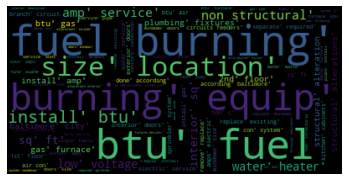

In [5]:
description_list = house_permit_value_filter['tokenized_final'].tolist()
description_text = (' '.join(description_list))
wordcloud_description = WordCloud().generate(description_text)
plt.imshow(wordcloud_description, interpolation = 'bilinear')
plt.axis('off')

In [11]:
fdist = FreqDist(description_list)

In [12]:
df_freq = pd.DataFrame(fdist.items(), columns=['word', 'frequency'])

In [13]:
# sort words by most frequent-least frequent
df_freq = df_freq.sort_values(by = "frequency", ascending = False).reset_index()
del df_freq["index"]

In [14]:
df_freq.head(10)

,word,frequency
0,"['install', 'btu', 'fuel-burning', 'equip']",8321
1,"['install', 'gas', 'test']",2250
2,"['install', 'amps', 'electric', 'service', '60...",2078
3,"['install', 'branch', 'circuits/feeders']",1741
4,"['install', 'low', 'voltage']",1392
5,"['install', 'water', 'service', 'pipe', '1-2',...",1194
6,"['install', 'branch', 'circuits/feeders', 'amp...",1120
7,"['point', 'protection', 'low', 'voltage', 'sec...",1034
8,"['install', 'plumbing', 'fixtures']",1015
9,"['install', 'sanitary', 'connection', '1-2', '...",950


In [15]:
text_list = (" ").join(description_list)

In [16]:
wordcloud_text_list = WordCloud().generate(text_list)

(-0.5, 399.5, 199.5, -0.5)

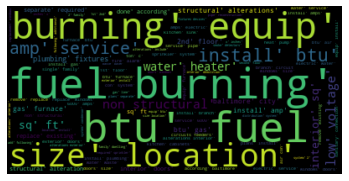

In [17]:
# show the word cloud using matplotlib 
# bilinear helps clarify the text
plt.imshow(wordcloud_text_list, interpolation='bilinear')
# remove the axes from the plot since thse dont help us with a wordcloud
plt.axis("off")

(-0.5, 1999.5, 1999.5, -0.5)

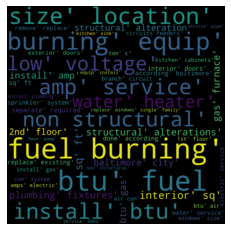

In [18]:
# edit wordcloud image
wordcloud_text_list = WordCloud(max_words=50, 
                             height = 2000,
                             width = 2000,
                             background_color="black").generate(text_list)
# create a plot
plt.figure()
# add wordcloud data to plot
plt.imshow(wordcloud_text_list, interpolation="bilinear")
# remove axes from plot
plt.axis("off")